# Logistic Regression

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/COGNAC/LERNEN/Kirill_DS/2_Modelling/3_LogisticRegression/Email-Offer.csv')

In [3]:
df.head()

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0


dummify Gender and drop one Variable

In [4]:
X = pd.get_dummies(df, columns=['Gender'], drop_first = True)

extract the target vector from X

In [5]:
y = X.pop('TookAction')

add a constant to X

In [6]:
X['const'] = 1
X.head()

,Age,Gender_Male,const
0,38,0,1
1,32,0,1
2,46,1,1
3,34,1,1
4,40,1,1


In [7]:
LR = linear_model.LogisticRegression(C=1e5, fit_intercept=False)

As for training reasons I have added a constant by hand (above), we have to set fit_intercept = False, as it would add another constant to the equation.

In [8]:
LR.fit(X,y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
print LR.coef_

[[  0.88522539   4.42698773 -38.06556376]]


These are the coefficients for age, male and the constant.
Now let's see, how the model is doing...

In [10]:
y_pred = LR.predict(X)

And print a confusion matrix:

In [11]:
print confusion_matrix(y, y_pred)

[[58  2]
 [ 4 36]]


In [52]:
y_proba = LR.predict_proba(X)[:,1]

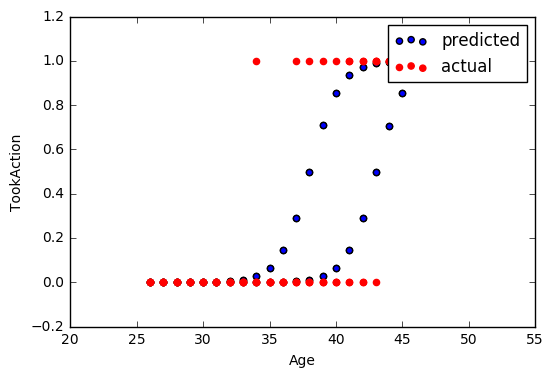

In [53]:
fig = plt.figure()
plt.scatter(X['Age'], y_proba, label = 'predicted')
plt.scatter(X['Age'], y, color='r', label = 'actual')
ax = fig.add_subplot(111)
ax.set_xlabel('Age')
ax.set_ylabel('TookAction')
ax.legend()